# Graded Challenge 3

`Nurrahmawati Batch 002`

## Introductions
Saya adalah seorang data analis di The Look yang merupakan salah satu platform e-commerce terbesar di planet Mars. Saya membuat laporan evaluasi aktivitas penjualan di platform tersebut.

Untuk mempermudah pekerjaan saya supaya terarah, saya harus menentukan problem statement dengan success criteria berdasarkan SMART. Namun tantangannya, saya tentukan problem statement berdasarkan penjabaran-penjabaran analisis dalam bentuk persoalan yang harus saya jawab menggunakan Query SQL. (SMART akan berdasarkan dari poin-poin penjabaran).

## Problem Statement
 Dalam analisis ini, Saya menyelidiki pendapatan dari The Look e-commerce melalui jumlah transaksi dengan kategori produk yg paling banyak dibeli oleh user pada tiap bulannya selama Q1 sampai Q3 tahun 2022 dalam rangka meningkatkan penjualan 

 Problem statement dijelaskan lebih lanjut menjadi:
1.  Berapa jumlah transaksi yang berstatus Complete tiap bulan selama Q1 sampai Q3 di tahun 2022?
2. Berikan informasi total penjualan (dalam USD) tiap bulan selama Q1 sampai Q3 di tahun 2022!
3. Berapa user yang melakukan transaksi berstatus Complete di tiap bulan dari Q1 sampai Q3 2022?
4. Kategori produk apa saja yang paling banyak dibeli (staus transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022?
5. Kategori produk apa saja yang paling banyak mendapatkan pendapatan (staus transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022?
6. Dibandingkan dengan jumlah transaksi dan total penjualan, mana yang paling berkaitan dengan jumlah user yang melakukan transaksi?

# Analisis Data

In [37]:
#importing libraries 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sn

In [38]:
# Authenticating google.collab account
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# connecting to bigquery services
from google.cloud import bigquery
project_id = "hactiv8-nurrahmawati" 
client = bigquery.Client(project=project_id)

Authenticated


Poin penjabaran:

1. Berapa jumlah transaksi yang berstatus Complete tiap bulan selama Q1 sampai Q3 di tahun 2022? Insight apa yang bisa kamu berikan?

In [39]:
df_1 = client.query('''
SELECT *, sum(Jumlah_Transaksi) over(PARTITION BY Quarter ORDER BY Bulan ASC) AS Transaksi_Quarter
FROM (SELECT Tahun, Bulan,
  CASE WHEN Bulan BETWEEN 1 AND 3 THEN 'Q1'
  WHEN Bulan BETWEEN 4 AND 6 THEN 'Q2'
  WHEN Bulan BETWEEN 7 AND 9 THEN 'Q3' END AS Quarter,
  Jumlah_Transaksi
FROM (SELECT 
      extract(year FROM items.created_at) AS Tahun, 
      extract(month FROM items.created_at) AS Bulan, 
      count(items.created_at) AS Jumlah_Transaksi
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS items
JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
ON items.product_id = inventory.product_id
WHERE items.status='Complete' AND 
      items.created_at >= '2022-01-01 00:00:00 UTC' AND 
      items.created_at <= '2022-09-30 23:59:59 UTC'
GROUP BY Tahun, Bulan
ORDER BY Tahun, Bulan ASC))
''').to_dataframe()

df_1

,Tahun,Bulan,Quarter,Jumlah_Transaksi,Transaksi_Quarter
0,2022,1,Q1,30694,30694
1,2022,2,Q1,28771,59465
2,2022,3,Q1,36596,96061
3,2022,4,Q2,39251,39251
4,2022,5,Q2,42266,81517
5,2022,6,Q2,43319,124836
6,2022,7,Q3,54017,54017
7,2022,8,Q3,61919,115936
8,2022,9,Q3,68960,184896


Berdasarkan data tersebut, dapat kita lihat untuk jumlah transaksi dengan berstatus complete pada The Look e-commerce meningkat untuk tiap bulannya berawal dari bulan Maret hingga bulan September, pada bulan Januari ke Februari mengalami keturunan jumlah transaksi dengan sebesar 0,23 %

---


2. Berikan informasi total penjualan (dalam USD) tiap bulan selama Q1 sampai Q3 di tahun 2022! (Hanya yang transaksi berstatus Complete. Apa informasi yang bisa kamu sampaikan?


In [40]:
df_2 = client.query('''
SELECT *, round(sum(Total_Penjualan) over(PARTITION BY Quarter ORDER BY Bulan ASC), 2) AS GMV_Quarter
FROM (SELECT Tahun, Bulan,
  CASE WHEN Bulan BETWEEN 1 AND 3 THEN 'Q1'
  WHEN Bulan BETWEEN 4 AND 6 THEN 'Q2'
  WHEN Bulan BETWEEN 7 AND 9 THEN 'Q3' END AS Quarter,
  round(penjualan, 2) as Total_Penjualan
FROM (SELECT 
      extract(year FROM items.created_at) AS Tahun, 
      extract(month FROM items.created_at) AS Bulan, 
      sum(items.sale_price) AS penjualan
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS items
JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
ON items.product_id = inventory.product_id
WHERE items.status='Complete' AND 
      items.created_at >= '2022-01-01 00:00:00 UTC' AND 
      items.created_at <= '2022-09-30 23:59:59 UTC'
GROUP BY Tahun, Bulan
ORDER BY Tahun, Bulan ASC))
''').to_dataframe()

df_2

,Tahun,Bulan,Quarter,Total_Penjualan,GMV_Quarter
0,2022,1,Q1,1831701.45,1831701.45
1,2022,2,Q1,1703247.71,3534949.16
2,2022,3,Q1,2235412.34,5770361.50
3,2022,4,Q2,2404530.33,2404530.33
4,2022,5,Q2,2462764.37,4867294.70
5,2022,6,Q2,2580495.54,7447790.24
6,2022,7,Q3,3374706.12,3374706.12
7,2022,8,Q3,3700024.32,7074730.44
8,2022,9,Q3,4100365.17,11175095.61


Data ini menjelaskan total penjualan yang telah dilakukan dengan berstatus complete pada The Look e-commerce. Berdasarkan data ini, terlihat peningkatan total penjualan pada tiap bulannya di Q1 sampai Q3 tahun 2022 dengan total penjualan terbanyak sebesar sekitar `4,28jt US$` dibulan September 2022

---

3. Berapa user yang melakukan transaksi berstatus Complete di tiap bulan dari Q1 sampai Q3 2022? Apa kesimpulanmu?


In [41]:
df_3 = client.query('''
SELECT Tahun, Bulan,
  CASE WHEN Bulan BETWEEN 1 AND 3 THEN 'Q1'
  WHEN Bulan BETWEEN 4 AND 6 THEN 'Q2'
  WHEN Bulan BETWEEN 7 AND 9 THEN 'Q3' END AS Quarter,
  Jumlah_User
FROM (SELECT 
      extract(year FROM items.created_at) AS Tahun, 
      extract(month FROM items.created_at) AS Bulan, 
      count(distinct(items.user_id)) AS Jumlah_User
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS items
JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
ON items.product_id = inventory.product_id
WHERE items.status='Complete' AND 
      items.created_at >= '2022-01-01 00:00:00 UTC' AND 
      items.created_at <= '2022-09-30 23:59:59 UTC'
GROUP BY Tahun, Bulan
ORDER BY Tahun, Bulan ASC)
''').to_dataframe()

df_3

,Tahun,Bulan,Quarter,Jumlah_User
0,2022,1,Q1,1092
1,2022,2,Q1,1019
2,2022,3,Q1,1307
3,2022,4,Q2,1404
4,2022,5,Q2,1496
5,2022,6,Q2,1542
6,2022,7,Q3,1903
7,2022,8,Q3,2184
8,2022,9,Q3,2398


Jumlah user menunjukkan banyaknya user_id yang melakukan transaksi dengan berstatus complete di The Look e-commerce. Pada data tersebut, jumlah user paling sedikit terdapat di bulan Februari tahun 2022 sedangkan pada bulan lainnya mengalami peningkatan untuk tiap bulannya. 

---

4. Kategori produk apa saja yang paling banyak dibeli (staus transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!


In [42]:
df_4 = client.query('''
SELECT Tahun, Bulan,
  CASE WHEN Bulan BETWEEN 1 AND 3 THEN 'Q1'
  WHEN Bulan BETWEEN 4 AND 6 THEN 'Q2'
  WHEN Bulan BETWEEN 7 AND 9 THEN 'Q3' END AS Quarter,
  Category AS Kategori, Jumlah_Item
FROM (SELECT *, 
      row_number() over(PARTITION BY Bulan ORDER BY Jumlah_Item DESC) AS Row
FROM (SELECT 
      extract(year FROM items.created_at) AS Tahun, 
      extract(month FROM items.created_at) AS Bulan,
      inventory.product_category AS Category, 
      count(items.product_id) AS Jumlah_Item
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS items
JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
ON items.product_id = inventory.product_id
WHERE items.status='Complete' AND 
      items.created_at >= '2022-01-01 00:00:00 UTC' AND 
      items.created_at <= '2022-09-30 23:59:59 UTC'
GROUP BY Tahun, Bulan, Category
ORDER BY Tahun, Bulan ASC))
WHERE Row = 1
ORDER BY Bulan, Jumlah_Item
''').to_dataframe()

df_4

,Tahun,Bulan,Quarter,Kategori,Jumlah_Item
0,2022,1,Q1,Jeans,2221
1,2022,2,Q1,Intimates,2312
2,2022,3,Q1,Jeans,2747
3,2022,4,Q2,Shorts,2854
4,2022,5,Q2,Jeans,3039
5,2022,6,Q2,Intimates,3424
6,2022,7,Q3,Jeans,4061
7,2022,8,Q3,Jeans,4331
8,2022,9,Q3,Jeans,5091


The Look e-commerce memiliki beberapa kategori produk dalam penjualannya. Berikut data kategori produk dengan penjualan terbanyak dengan berstatus complete di tiap bulannya dari Q1 hingga Q3 tahun 2022. Berdasarkan data ini, terdapat 5 kategori terbanyak penjualannya dari 26 kategori produk the Look e-commerce pada periode Q1 hingga Q3 tahun 2022 yang menampilkan kategori berbeda pada tiap bulannya. Kategori produk Jeans memiliki frequensi kategori produk terbanyak namun pada kategori Tops & Tees memiliki angka tertinggi jumlah item yang terjual dibandingkan dengan kategori lainnya selama periode tersebut.

---

5. Kategori produk apa saja yang paling banyak mendapatkan pendapatan (staus transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!


In [43]:
df_5 = client.query('''
SELECT Tahun, Bulan,
  CASE WHEN Bulan BETWEEN 1 AND 3 THEN 'Q1'
  WHEN Bulan BETWEEN 4 AND 6 THEN 'Q2'
  WHEN Bulan BETWEEN 7 AND 9 THEN 'Q3' END AS Quarter,
  Category AS Kategori, round(income, 2) as Pendapatan
FROM (SELECT *, 
      row_number() over(PARTITION BY Bulan ORDER BY income DESC) AS Row
FROM (SELECT 
      extract(year FROM items.created_at) AS Tahun, 
      extract(month FROM items.created_at) AS Bulan,
      inventory.product_category AS Category, 
      sum(items.sale_price) AS income
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS items
JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
ON items.product_id = inventory.product_id
WHERE items.status='Complete' AND 
      items.created_at >= '2022-01-01 00:00:00 UTC' AND 
      items.created_at <= '2022-09-30 23:59:59 UTC'
GROUP BY Tahun, Bulan, Category
ORDER BY Tahun, Bulan ASC))
WHERE Row = 1
ORDER BY Bulan
''').to_dataframe()

df_5

,Tahun,Bulan,Quarter,Kategori,Pendapatan
0,2022,1,Q1,Outerwear & Coats,215697.49
1,2022,2,Q1,Outerwear & Coats,227229.75
2,2022,3,Q1,Jeans,283307.76
3,2022,4,Q2,Outerwear & Coats,283528.31
4,2022,5,Q2,Jeans,317869.81
5,2022,6,Q2,Jeans,313301.30
6,2022,7,Q3,Outerwear & Coats,495873.73
7,2022,8,Q3,Outerwear & Coats,453461.46
8,2022,9,Q3,Outerwear & Coats,574564.88


Berdasarkan data yang telah di analis ini, terdapat 2 kategori yang memiliki pengaruh tinggi penjualannya terhadap pendapatan di The Look e-commerce. Pada kategori Outerwear & Coats memiliki frequensi terbanyak yg memberikan pendapatan tertinggi terhadap The Look e-commerce pada periode Q1 hingga Q3 tahun 2022 dengan memiliki angka pendapatan tertinggi sebesar `602894 US$` pada bulan September 2022.

---

6. Dibandingkan dengan jumlah transaksi dan total penjualan, mana yang paling berkaitan dengan jumlah user yang melakukan transaksi? Apa analisis yang dapat kamu jelaskan? (Hint: Kamu bisa menggunakan korelasi)

In [44]:
# menghitung korelasi antara jumlah user dan jumlah transaksi

kor1 = client.query('''
        SELECT Jumlah_User, Jumlah_Transaksi
FROM (SELECT 
      extract(year FROM items.created_at) AS Tahun, 
      extract(month FROM items.created_at) AS Bulan, 
      count(distinct(items.user_id)) AS Jumlah_User,
      count(items.created_at) AS Jumlah_Transaksi
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS items
JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
ON items.product_id = inventory.product_id
WHERE items.status='Complete' AND 
      items.created_at >= '2022-01-01 00:00:00 UTC' AND 
      items.created_at <= '2022-09-30 23:59:59 UTC'
GROUP BY Tahun, Bulan
ORDER BY Tahun, Bulan ASC)
''').to_dataframe()
kor1

,Jumlah_User,Jumlah_Transaksi
0,1092,30694
1,1019,28771
2,1307,36596
3,1404,39251
4,1496,42266
5,1542,43319
6,1903,54017
7,2184,61919
8,2398,68960


In [45]:
# Menentukan hypothesis
# H0= jumlah user memiliki keterkaitan terhadap jumlah transaksi
# H1= jumlah user tidak memiliki keterkaitan terhadap jumlah transaksi

#Membuat tabel kontingensi
ct=pd.crosstab(kor1["Jumlah_User"],kor1["Jumlah_Transaksi"])
# Memeriksa keterkaitan antara jumlah user dengan jumlah transaksi
stat, p, dof, expected = stats.chi2_contingency(ct)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably dependent')
else:
    print('Probably independent')

p=0.230
Probably dependent


Analisis data ini menggunakan perhitungan statistika chi kuadrat yg mana untuk menentukan korelasi antara jumlah user dengan jumlah transaksi. Berdasarkan hasil ini menunjukkan bahwa dapat disimpulkan bahwa gagal menolak H0, artinya jumlah user memiliki korelasi atau keterkaitan terhadap jumlah transaksi.

In [46]:
# menghitung korelasi antara jumlah user dan total penjualan

kor2 = client.query('''
        SELECT Jumlah_User, round(penjualan, 2) AS Total_Penjualan
FROM (SELECT 
      extract(year FROM items.created_at) AS Tahun, 
      extract(month FROM items.created_at) AS Bulan, 
      count(distinct(items.user_id)) AS Jumlah_User,
      sum(items.sale_price) AS penjualan
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS items
JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` AS inventory
ON items.product_id = inventory.product_id
WHERE items.status='Complete' AND 
      items.created_at >= '2022-01-01 00:00:00 UTC' AND 
      items.created_at <= '2022-09-30 23:59:59 UTC'
GROUP BY Tahun, Bulan
ORDER BY Tahun, Bulan ASC)
''').to_dataframe()
kor2

,Jumlah_User,Total_Penjualan
0,1092,1831701.45
1,1019,1703247.71
2,1307,2235412.34
3,1404,2404530.33
4,1496,2462764.37
5,1542,2580495.54
6,1903,3374706.12
7,2184,3700024.32
8,2398,4100365.17


In [47]:
# Menentukan hypothesis
# H0= jumlah user memiliki keterkaitan terhadap total penjualan
# H1= jumlah user tidak memiliki keterkaitan terhadap total penjualan

#Membuat tabel kontingensi
ct=pd.crosstab(kor2["Jumlah_User"],kor2["Total_Penjualan"])
# Memeriksa keterkaitan antara jumlah user dengan total penjualan
stat, p, dof, expected = stats.chi2_contingency(ct)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably dependent')
else:
    print('Probably independent')

p=0.230
Probably dependent


Berdasarkan hasil dari analisis data ini dapat disimpulkan bahwa gagal menolak H0 yang artinya jumlah user memiliki korelasi atau keterkaitan terhadap total penjualan.

In [48]:
df_3 ['Jumlah_Transaksi']  = df_1['Jumlah_Transaksi']
df_3 ['Total_Penjualan'] = df_2['Total_Penjualan']
df_3

,Tahun,Bulan,Quarter,Jumlah_User,Jumlah_Transaksi,Total_Penjualan
0,2022,1,Q1,1092,30694,1831701.45
1,2022,2,Q1,1019,28771,1703247.71
2,2022,3,Q1,1307,36596,2235412.34
3,2022,4,Q2,1404,39251,2404530.33
4,2022,5,Q2,1496,42266,2462764.37
5,2022,6,Q2,1542,43319,2580495.54
6,2022,7,Q3,1903,54017,3374706.12
7,2022,8,Q3,2184,61919,3700024.32
8,2022,9,Q3,2398,68960,4100365.17


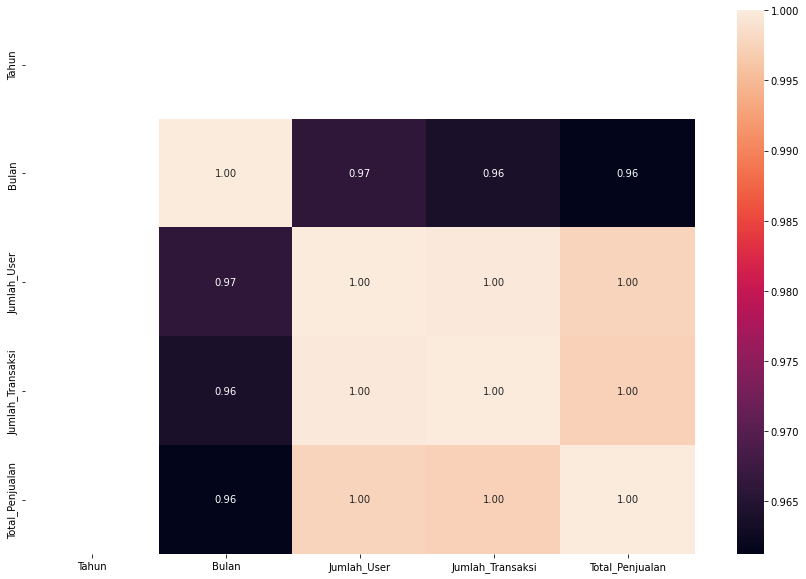

CPU times: user 235 ms, sys: 98.9 ms, total: 334 ms
Wall time: 223 ms


In [49]:
%%time
# Heatmap Correlation

plt.figure(figsize=(15,10))
sn.heatmap(df_3.corr(), annot=True, fmt='.2f')
plt.show()

Dengan memeriksa korelasi antara jumlah user dengan jumlah transaksi dan total penjualannya menggunakan heatmap correlation, ditemukan bahwa jumlah user memiliki korelasi yang sangat tinggi terhadap jumlah transaksi dan total penjualan dengan angka yang mendekati angka 1, artinya berbanding lurus jika jumlah user meningkat maka jumlah transaksi maupun total penjualannya pun akan meningkat.

---

## Analisis

Berdasarkan perhitungan di atas, dapat disimpulkan bahwa pada Q1 hingga Q3 tahun ini, The Look e-commerce memiliki peningkatan pendapatan melalui jumlah transaksi dengan kategori produk yg paling banyak dibeli oleh user pada tiap bulannya. Total penjualan meningkat disetiap bulannya dengan total penjualan terbanyak sebesar sekitar `4,28jt US$` dan untuk kategori produk Outerwear & Coats memberikan pendapatan terbesar terhadap The Look e-commerce dengan angka tertinggi sebesar `602894 US$` pada bulan September 2022. Hal ini berarti memiliki korelasi terhadap jumlah user dengan jumlah transaksi dan total penjualannya, dengan semakin tingginya jumlah user maka jumlah transaksi dan total penjualannya juga akan meningkat.

Hal ini dapat kita rumuskan kembali tujuan untuk periode Q4 pada tahun ini.
Kriteria keberhasilannya adalah sebagai berikut:
Meningkatkan pendapat The Look e-commerce melalui jumlah transaksi menjadi 60% dari Quarter sebelumnya untuk periode Q4 pada tahun 2022.
Tujuan ini dapat dicapai dengan cara:
- membuat promosi yang mendorong pembelian berulang untuk kategori tertentu.
- membuat upaya pemasaran ke berbagai platform untuk meningkatkan jumlah transaksi dan pendapatan.


## Menjawab pertanyaan

1. Rumusan masalah yang dinyatakan di awal analisis memiliki kriteria keberhasilan yang terukur, hal ini karena tujuannya pada akhirnya adalah untuk meningkatkan pendapatan terhadap The Look e-commerce melalui jumlah transaksi dengan kategori produk yg paling banyak dibeli oleh user pada tiap bulannya dan tujuan ini selanjutnya ditentukan untuk meningkatkan jumlah transaksi menjadi 60% dari Quarter sebelumnya. Tujuan ini terukur dan dan dapat dihitung.
2. Berdasarkan hasil analisis, jika CEO perusahaan ingin menargetkan pendapatan di awal kuartal 4 harus mencapai `$250000` itu memungkinkan dapat terjadi jika dilihat dalam hasil analisis pendapatan The Look e-commerce selalu mengalami kenaikan dalam setiap bulannya sedangkan pada akhir kuartal 3 sudah mencapai pendapatan sebesar sekitar `4,28jt US$` sehingga untuk capaian `250rb US$` itu dapat dimungkinkan tercapai.
3. Berdasarkan data yang telah dianalisis, saya akan memberikan info terpenting kepada CEO sebelum memutuskan untuk investor. Poin-poin yang akan kita fokuskan yaitu berdasarkan trend transaksi, jumlah user yang bertransaksi, dan GMV dari 3 Quarter sebelumnya. Dari data tersebut telah kita simpulkan bahwa ketiga point tersebut pada The Look e-commerce yang menghasilkan trend positif atau selalu mengalami kenaikan pada setiap Quarternya sehingga dapat melihat prediksi keadaan pada Quarter 4. Jadi The Look e-commerce merupakan tempat yang tepat atau layak untuk berinvestasi.